## Data Cleaning

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('superstore_data.csv')
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Handling Missing Values

In [5]:
# Check for missing values
df.isna().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [6]:
# Drop entries with missing value
df = df.dropna(subset = ['Income'])
df.isna().sum()

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64

### Correcting Data Types

In [7]:
# Change data types
df['Id'] = df['Id'].astype('str')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Income'] = df['Income'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   2216 non-null   object        
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   int64         
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

## Feature Engineering

I decided to create two new features for the data: Age and TotalAmount. The birth year was given in the data, but I felt age was a more appropriate feature that would better for the visualizations of the analysis. Additionally the data gave the amount spent on various types of products, which I combined into a total amount spent.

In [8]:
# Create an age feature
yr = 2024
df['Age'] = yr-df['Year_Birth']

In [9]:
# Create a total purchase amount feature
df['TotalAmount'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   2216 non-null   object        
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   int64         
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [11]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,TotalAmount
0,1826,1970,Graduation,Divorced,84835,0,0,2014-06-16,0,189,...,218,1,4,4,6,1,1,0,54,1190
1,1,1961,Graduation,Single,57091,0,0,2014-06-15,0,464,...,37,1,7,3,7,5,1,0,63,577
2,10476,1958,Graduation,Married,67267,0,1,2014-05-13,0,134,...,30,1,3,2,5,2,0,0,66,251
3,1386,1967,Graduation,Together,32474,1,1,2014-11-05,0,10,...,0,1,1,0,2,7,0,0,57,11
4,5371,1989,Graduation,Single,21474,1,0,2014-08-04,0,6,...,34,2,3,1,2,7,1,0,35,91


## Exploratory Data Analysis

In [12]:
df.describe(include='int').T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2216.0,1968.820397,11.985554,1893.0,1959.0,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.0,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.0,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.0,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.0,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.0,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.0,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.0,12.0,50.00,259.0
MntSweetProducts,2216.0,27.028881,41.072046,0.0,1.0,8.0,33.00,262.0


<Axes: >

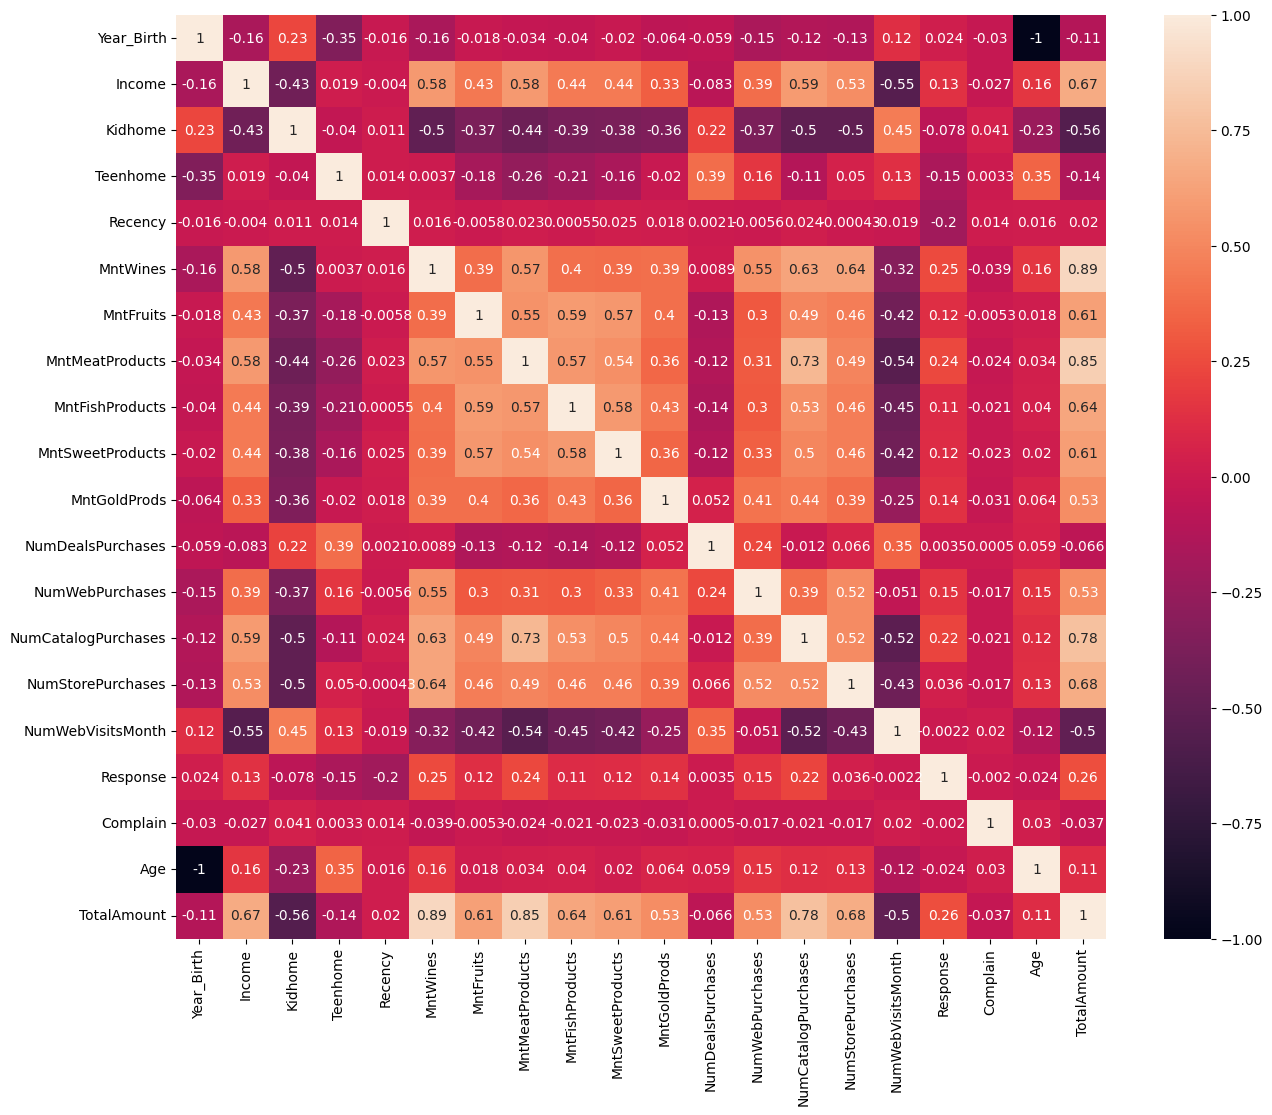

In [13]:
# View correlation of features
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(numeric_only=True),annot=True)

After viewing the heatmap, I decided I wanted to further explore trends on the Age, Income, Recency, and TotalAmount features.

In [14]:
df1 = df[['Age','Income','Recency','TotalAmount']]
df1.sample(10)

,Age,Income,Recency,TotalAmount
500,60,65526,22,506
905,69,62972,39,587
2043,43,56981,91,1241
629,43,87171,27,1298
2229,50,20130,99,34
467,70,39898,20,134
1649,65,68805,73,283
386,38,20491,16,30
746,66,79761,32,605
1843,52,55260,81,1139


In [15]:
# Checking for skewed data
df1.skew()

Age            0.353661
Income         6.763487
Recency        0.001648
TotalAmount    0.858055
dtype: float64

### Removing Outliers

In [16]:
# Removing Outliers
columns = ['Age','Income','Recency','TotalAmount']
for i in columns:
    q_low = df1[i].quantile(0.01)
    q_hi  = df1[i].quantile(0.99)

    df1 = df1[(df1[i] < q_hi) & (df1[i] > q_low)]
df1.skew()

Age            0.093066
Income         0.025125
Recency       -0.002769
TotalAmount    0.806133
dtype: float64

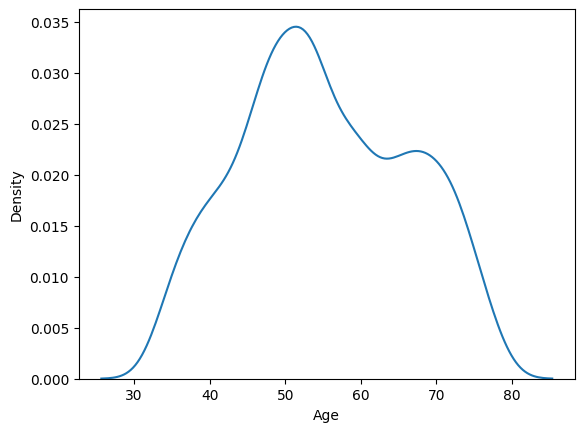

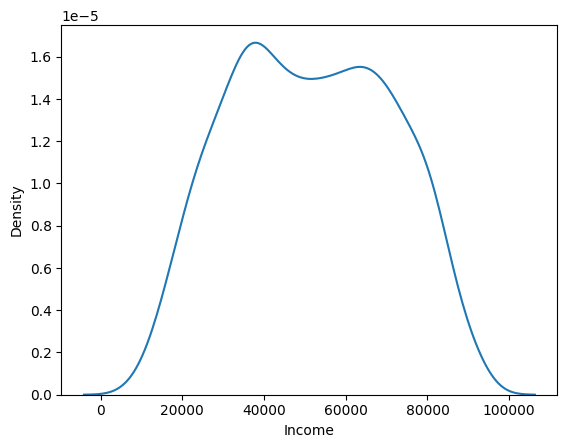

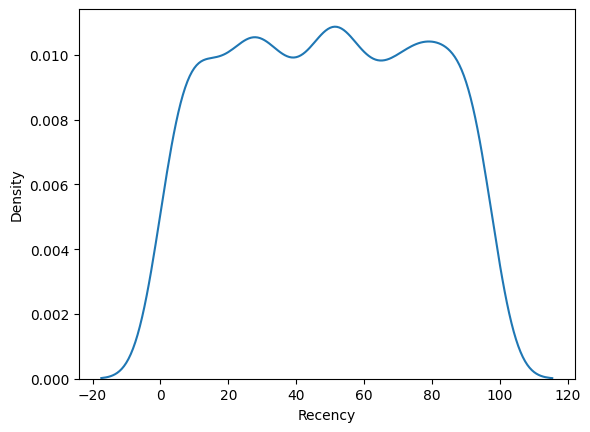

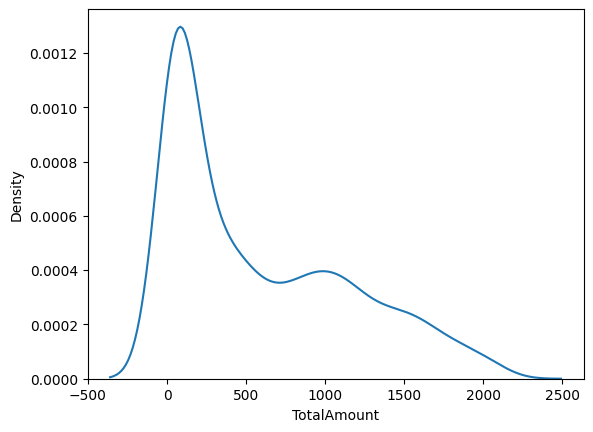

In [17]:
# Look at the density plot for each feature and get a better view of the distribution
for i in columns:
    plt.figure()
    sns.kdeplot(df1[i])

### Bivariate Analysis

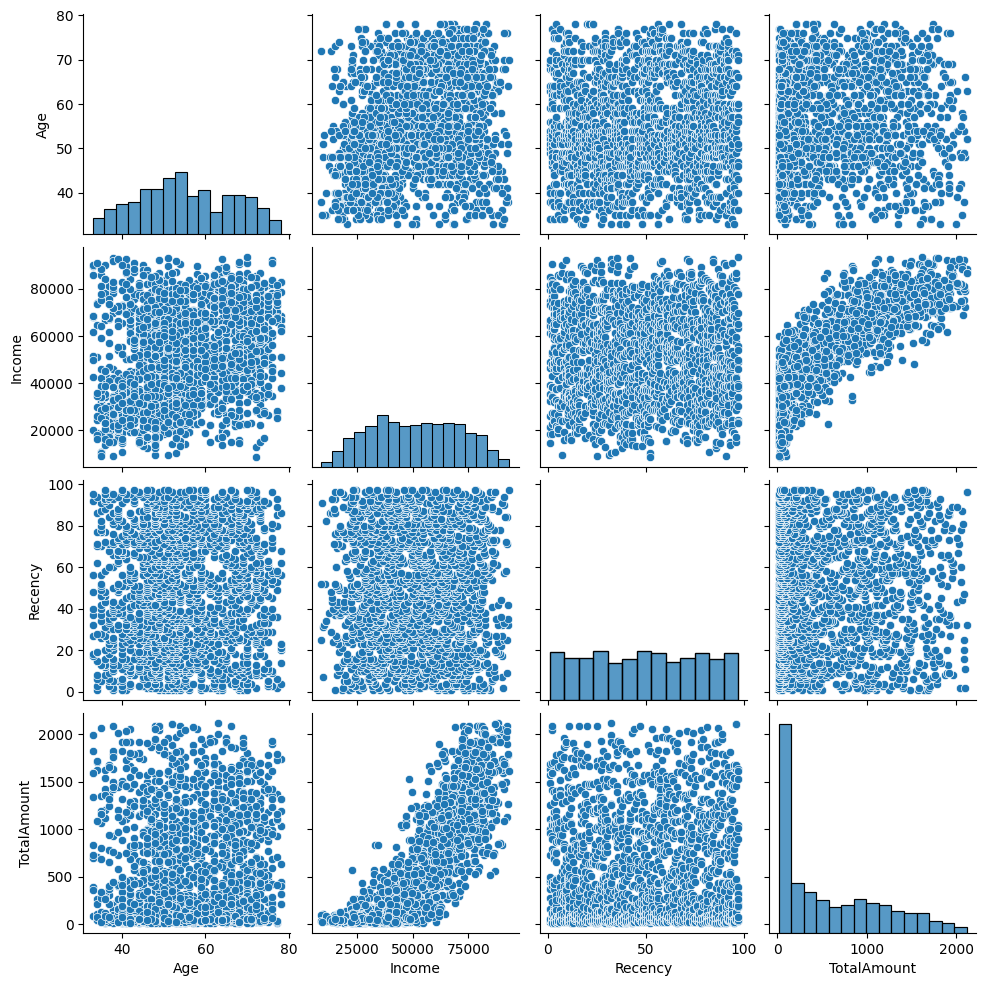

In [18]:
sns.pairplot(data=df1)

In [19]:
df1.to_csv('segmentation_data.csv', index=False)